# R Dataframes
### AJ Zerouali, 2023/06/14

This is a draft of my R_basics_II notes section on R dataframes.

### Contents (tentative)
1) Reading and saving CSV files
2) Date and time objects in R
3) The *yahoofinancer* package
4) Row and column selection in R
5) Fundamental operations on *data.frame*s

**Why am I looking at R?**
- Because R is the most complete for stats.
- Because it inspired Pandas dataframes.
- Because it has a large number of time series analysis packages that aren't available in Python. In particular, multivariate garch.
- Because it has an SDE package that is not available in Python.
- Because I can call R packages from Python.

**Why should I invest time on learning R?**
- Because it's easy and very useful and cool.
- Because of all of the above.

**Why spend so much time on dataframes?**
- Because I want to work with time series, and there is no way around dataframes for those.

**What do I do with dataframes?**
- I read dataframes from CSV files, download them, and save them as CSV files.
- I create dataframes with pre-determined columns or dates.
- One of my columns is very often a date variable.
- I add/drop rows and columns.
- I use conditional selection to get specific sub-dataframes.
- I modify specific entries of dataframes, specified by row-column data.
- I rename columns, and I rename the dates.
- I apply functions (transformations) to specific entries (either entire columns, or selected rows).
- I sort the dataframe by 
- I deal with missing values, either by front/backfilling, or dropping entire columns if most values are missing.

## 1) Date and time objects in R

There are many classes to deal with dates and times in R. Here we briefly mention:
* The *Date* (base R).
* The *timeDate* class from the package of the same name.
* The *POSIXlt* and *POSIXct* classes (base R).
* The *lubridate* package, which is popular among data scientists.

References for the *Date* class:  
* Section 3.6 of Kabacoff.
* https://faculty.washington.edu/ezivot/blog/dateTimeObjectsInR.html

Kabacoff discusses only the *Date* class in section 3.6 of his book. Although it only encodes days, we will discuss this class briefly since it gives an idea of how the other classes work.

More generally, dealing with date and time is done using the *POSIXlt* and *POSIXct* (S3) classes:
* https://stat.ethz.ch/R-manual/R-devel/library/base/html/as.POSIXlt.html
For example, these are by the *yahoofinancer* package that we discuss below.

Lastly, we will briefly illustrate some functionalities of the *lubridate* package, which provides utilities for the manipulation of time and date objects.


**Comments (23/06/12):**
* Visit this prof's webpage: https://faculty.washington.edu/ezivot/. He has a free finance course on coursera

### 1.a - The *Date*, *timeDate*, and *difftime* classes

#### Basics

To compare this with Python's *datetime* package, *timeData* is similar to the *datetime* class, and *difftime* is similar to the *timedelta* class. At a more elementary level, we start with the *Date* class.

Typically, dates in R are entered as characters/strings, and then converted to a date object using the function *as.Date()*. The signature is as follows:

        as.Date(x, format, tryFormats, optional, origin, tz)
where:
* *x*: is the object to be converted to a date.
* *format*: character string. If not specified, it will try tryFormats one by one on the first non-NA element, and give an error if none works. Otherwise, the processing is via strptime() whose help page describes available conversion specifications. Default format is "%Y-%m-%d".
* *tryFormats*: character vector of format strings to try if format is not specified.
* *optional*: logical indicating to return NA (instead of signalling an error) if the format guessing does not succeed.
* *origin*: a Date object, or something which can be coerced by as.Date(origin, ...) to such an object or missing. In that case, "1970-01-01" is used.
* *tz*: a time zone name.

This class is implemented as an S3 class. Here is an elementary example:

In [16]:
# Create date object
date_1 <- as.Date("2022-01-01")
# Show object
cat("date_1 = ", date_1, "\n")
cat("------------------\n")
# Show class
cat("class(date_1) = ", class(date_1), "\n")
cat("------------------\n")
# Show structure
cat("str(date_1) : \n")
str(date_1)
cat("------------------\n")
# Show attributes
cat("attributes(date_1) : \n")
attributes(date_1)
cat("------------------\n")

date_1 =  18993 
------------------
class(date_1) =  Date 
------------------
str(date_1) : 
 Date[1:1], format: "2022-01-01"
------------------
attributes(date_1) : 


$class
[1] "Date"

------------------


To display the date in the specified format, we use the *format()* function:

In [17]:
# Print date:
cat("format(date_1) = ", format(date_1))

format(date_1) =  2022-01-01

Within the *Date* class, the date is stored as an integer. It is interesting to note that the subtraction operation is overloaded to this class.

In [21]:
# Begin and end date
start_date <- as.Date("2012-01-01")
end_date <- as.Date("2022-12-31")
# Get time difference
time_delta <- end_date - start_date
# Show
cat("start_date = ", format(start_date),"\n")
cat("end_date = ", format(end_date),"\n")
cat("end_date - start_date = \n")
time_delta

start_date =  2012-01-01 
end_date =  2022-12-31 
end_date - start_date = 


Time difference of 4017 days

More generally, we can work with the *timeDate* class that encodes the time and timezone following the  ISO 8601 standard as well as of the ANSI C and POSIX standards. The CRAN page of this package is here:
https://cran.r-project.org/web/packages/timeDate/index.html

Again, we can instantiate a *timeDate* object using the function *as.timeDate()*, or more directly by instantiating the constructor (it's an S4 class):

        timeDate(charvec, format = NULL, zone = "", FinCenter = "", ...)
Here is an example:

In [44]:
# Import timeDate:
library(timeDate)

In [49]:
# Create timeDate obj
datetime_1 <- timeDate("2012-01-01 15:30", zone = "EST", FinCenter = "America/NewYork")

In [51]:
datetime_1

America/NewYork
[1] [2012-01-01 15:30:00]

Finally, we can look at the *difftime* class. Objects of this S3 class can be instantiated as follows:

In [52]:
# Get time difference
time_delta_1 <- difftime("2022-12-31","2012-01-11", units = "hours")
time_delta_1

Time difference of 96168 hours

Finally, to get the present time, we can use the *Sys.Date()* or *date()* functions:

In [54]:
# Get current day/time
current_date <- Sys.Date()
cat("Sys.Date() = ", current_date, "\n")
cat("class(Sys.Date()) : ", class(current_date), "\n")

current_datetime <- date()
cat("date() = ", current_datetime, "\n")
cat("class(date()) = ", class(current_datetime), "\n")

Sys.Date() =  19521 
class(Sys.Date()) :  Date 
date() =  Tue Jun 13 01:42:33 2023 
class(date()) =  character 


#### Date and time formats

Kabacoff discusses the formats in 3.6 on pages 54-55. Useful points to retain are that the day and month names are represented with the characters "%a"/"%A" and "%b"/"%B" respectively. To illustrate, we will use:
* ***as.character()***: which converts *Date* and *timeDate* objects to strings (among others).
* ***strftime()***: which builds a string according to the desired date format.
Now:

In [68]:
strftime("2022-01-01", format = "%A %B %d, %Y")

[1] "Saturday, January 01, 2022"

In [69]:
strftime("2022-01-01", format = "%a %b %d, %Y")

[1] "Sat Jan 01, 2022"

In [74]:
char_date_1 <- as.character(date_1)
cat("as.character(date_1) = ", char_date_1,"\n")
char_date_2 <- strftime("2023-06-12", format = "%a %b %d, %Y")
cat("strftime(\"2023-06-12\", format = \"%a %b %d, %Y\") = ", char_date_2,"\n")

as.character(date_1) =  2022-01-01 
strftime("2023-06-12", format = "%a %b %d, %Y") =  Mon Jun 12, 2023 


### 1.b - The *POSIXlt* and *POSIXct* classes

POSIX stands for Portable Operating System Interface, and is the IEEE standard for representing calendar days. The *POSIXlt* class is used for days, while the *POSIXct* is used for date and time. As with the *Date* class, the easiest way to instantiate these objects is by giving a string and specifying the format.

We note that instantiating one of these objects always creates a *POSIXlt* object:


In [90]:
# Create objects
day_str <- "2023-06-12"
date_2 <- as.POSIXlt(day_str, format = "%Y-%m-%d", tz = "EST")
cat("date_2 = ")
date_2
cat("class(date_2) = ", class(date_2), "\n")
cat("------------------------------\n")
time_str <- "15:45"
datetime_2 <- as.POSIXct(paste(day_str, time_str, " "), format = "%Y-%m-%d %H:%M", tz = "EST")
cat("datetime_2 = ")
datetime_2
cat("class(datetime_2) = ", class(datetime_2), "\n")

date_2 = 

[1] "2023-06-12 EST"

class(date_2) =  POSIXlt POSIXt 
------------------------------
datetime_2 = 

[1] "2023-06-12 15:45:00 EST"

class(datetime_2) =  POSIXct POSIXt 


One interesting point to note here is that the coercion functions *as.POSIXlt()* and *asPOSIXct()* can be used to convert *Date* and *timeDate* objects to these classes, and vice versa.

### 1.b - The *lubridate* package

This package provides several tools for the manipulation of date and time related objects, using *POSIX* classes as a basis. The official documentation is here:

https://cran.r-project.org/web/packages/lubridate/index.html

A full list of the types of functions is shown when typing *help(lubridate)*. Unlike the standard *date()* or *Sys.Date()* functions for instance, here we have the *today()* and *now()* functions that return *POSIX* instances:

In [1]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# execute today() and now()
now_date <- today()
cat("today() = \n")
now_date
cat("class(today()): \n")
class(today())
now_datetime <- now()
cat("today() = \n")
now_datetime
cat("class(now()): \n")
class(now())

today() = 


[1] "2023-06-13"

class(today()): 


[1] "Date"

today() = 


[1] "2023-06-13 02:49:32 UTC"

class(now()): 


[1] "POSIXct" "POSIXt"

This package provides many functions to extract information from *POSIX*/*Date*/*timeDate* objects:

In [6]:
library(timeDate)

In [4]:
timeDate_obj <- timeDate::as.timeDate(now_datetime)
cat("timeDate_obj = \n")
timeDate_obj

timeDate_obj = 


GMT
[1] [2023-06-13 02:49:32]

In [10]:
cat("minute(timeDate_obj) = ", minute(timeDate_obj), "\n")
cat("day(now_datetime) = ", day(now_datetime), "\n")
cat("month(now_date) = ", month(now_date), "\n")

Warning message:
“tz(): Don't know how to compute timezone for object of class timeDate; returning "UTC".”


minute(timeDate_obj) =  49 
day(now_datetime) =  13 
month(now_date) =  6 


## 2) Downloading data with *yahoofinancer*

Yahoo finance for R: 
* Repo: https://cran.r-project.org/web/packages/yahoofinancer/index.html
* Documentation: https://cran.r-project.org/web/packages/yahoofinancer/yahoofinancer.pdf

As we will discuss dataframes at length, it will be useful to have an automated source of data to build said dataframes.

### 2.a - The *Ticker* class and price data downloading

The *yahoofinancer* uses a formal R6 class for the handling of tickers, see pages 8-13 of the docs. The usage is object oriented as opposed to the S3 classes used previously. By this, we mean that we use a constructor *Ticker\$new()* to create the *Ticker* object, and the object is manipulated using calls of the form *Ticker\$method()*.

In [1]:
library(yahoofinancer)

#### Downloading daily data for one ticker

When instantiating a ticker, one can specify the desired symbol as follows:

In [2]:
ticker_msft <- yahoofinancer::Ticker$new(symbol = 'MSFT')

Next, one downloads the data by calling the *get_history()*, and specifying the *start* and *end* dates, the *interval* and *period*. This function returns a *data.frame*:

In [20]:
df_msft <- ticker_msft$get_history(interval = '1d', 
                                   start = as.Date("2023-01-01", tz = 'EST'), 
                                   end = as.Date("2023-04-01", tz = "EST"))

In [21]:
head(df_msft)

,date,volume,high,low,open,close,adj_close
,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-01-03 14:30:00,25740000,245.75,237.40,243.08,239.58,238.4601
2,2023-01-04 14:30:00,50623400,232.87,225.96,232.28,229.10,228.0291
3,2023-01-05 14:30:00,39585600,227.55,221.76,227.20,222.31,221.2708
4,2023-01-06 14:30:00,43613600,225.76,219.35,223.00,224.93,223.8786
5,2023-01-09 14:30:00,27369800,231.24,226.41,226.45,227.12,226.0584
6,2023-01-10 14:30:00,27033900,231.31,227.33,227.76,228.85,227.7803


**Note:** The end date is non-inclusive.

In [22]:
tail(df_msft)

,date,volume,high,low,open,close,adj_close
,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
57,2023-03-24 13:30:00,28172000,280.63,275.28,277.24,280.57,279.9580
58,2023-03-27 13:30:00,26840200,281.46,275.52,280.50,276.38,275.7771
59,2023-03-28 13:30:00,21878600,276.14,272.05,275.79,275.23,274.6297
60,2023-03-29 13:30:00,25087000,281.14,278.41,278.96,280.51,279.8981
61,2023-03-30 13:30:00,25053400,284.46,281.48,284.23,284.05,283.4304
62,2023-03-31 13:30:00,32766000,289.27,283.00,283.73,288.30,287.6711


In [23]:
nrow(df_msft)

[1] 62

The *date* column of this output contains *POSIXct* objects:

In [18]:
msft_daily_dates <- df_msft$date
cat("df_msft$date[c(1:10)]:\n")
msft_daily_dates[c(1:10)]
cat("class(df_msft$date) = ", class(msft_daily_dates))

df_msft$date[c(1:10)]:


 [1] "2023-01-03 14:30:00 UTC" "2023-01-04 14:30:00 UTC"
 [3] "2023-01-05 14:30:00 UTC" "2023-01-06 14:30:00 UTC"
 [5] "2023-01-09 14:30:00 UTC" "2023-01-10 14:30:00 UTC"
 [7] "2023-01-11 14:30:00 UTC" "2023-01-12 14:30:00 UTC"
 [9] "2023-01-13 14:30:00 UTC" "2023-01-17 14:30:00 UTC"

class(df_msft$date) =  POSIXct POSIXt

#### Structure of the *Ticker* class

Here is more info on the *yahoofinancer::Ticker* class:

In [10]:
class(ticker_msft)

[1] "Ticker" "R6"

In [13]:
attributes(ticker_msft)

$class
[1] "Ticker" "R6"

In [15]:
str(ticker_msft)

Classes 'Ticker', 'R6' <Ticker>
  Public:
    asset_profile: active binding
    calendar_events: active binding
    clone: function (deep = FALSE) 
    company_officers: active binding
    earnings: active binding
    earnings_history: active binding
    earnings_trend: active binding
    esg_scores: active binding
    financial_data: active binding
    fund_bond_holdings: active binding
    fund_bond_ratings: active binding
    fund_equity_holdings: active binding
    fund_holding_info: active binding
    fund_holdings: active binding
    fund_ownership: active binding
    fund_performance: active binding
    fund_profile: active binding
    fund_section_weightings: active binding
    fund_top_holdings: active binding
    get_balance_sheet: function (frequency = c("annual", "quarter"), clean_names = TRUE) 
    get_cash_flow: function (frequency = c("annual", "quarter"), clean_names = TRUE) 
    get_history: function (period = "ytd", interval = "1d", start = NULL, end = NULL) 
    get_

In [16]:
ticker_msft$summary_detail

$maxAge
[1] 1

$priceHint
[1] 2

$previousClose
[1] 331.85

$open
[1] 334.465

$dayLow
[1] 330.4

$dayHigh
[1] 336.98

$regularMarketPreviousClose
[1] 331.85

$regularMarketOpen
[1] 334.465

$regularMarketDayLow
[1] 330.4

$regularMarketDayHigh
[1] 336.98

$dividendRate
[1] 2.72

$dividendYield
[1] 0.0082

$exDividendDate
[1] 1684281600

$payoutRatio
[1] 0.2817

$fiveYearAvgDividendYield
[1] 1.09

$beta
[1] 0.931034

$trailingPE
[1] 36.19664

$forwardPE
[1] 30.51096

$volume
[1] 13086312

$regularMarketVolume
[1] 13086312

$averageVolume
[1] 29693122

$averageVolume10days
[1] 28056490

$averageDailyVolume10Day
[1] 28056490

$bid
[1] 333.79

$ask
[1] 333.98

$bidSize
[1] 800

$askSize
[1] 800

$marketCap
[1] 2.48416e+12

$fiftyTwoWeekLow
[1] 213.43

$fiftyTwoWeekHigh
[1] 338.56

$priceToSalesTrailing12Months
[1] 11.96661

$fiftyDayAverage
[1] 306.7318

$twoHundredDayAverage
[1] 262.6042

$trailingAnnualDividendRate
[1] 2.66

$trailingAnnualDividendYield
[1] 0.00801567

$currency
[1] "USD"

$tradeable
[1] FALSE

#### Other *Ticker* methods

As we can see from the documentation, the *Ticker* class provides us with a lot of useful information to understand a given stock. For example, we can look at the banace sheet, the earning, the recommendation, the trend and the active filings. We illustrate with some examples below.

In [35]:
library(tibble)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [46]:
# MSFT asset profile
ticker_msft$asset_profile

$address1
[1] "One Microsoft Way"

$city
[1] "Redmond"

$state
[1] "WA"

$zip
[1] "98052-6399"

$country
[1] "United States"

$phone
[1] "425 882 8080"

$fax
[1] "425 706 7329"

$website
[1] "https://www.microsoft.com"

$industry
[1] "Software—Infrastructure"

$industryDisp
[1] "Software—Infrastructure"

$sector
[1] "Technology"

$longBusinessSummary
[1] "Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. The company operates in three segments: Productivity and Business Processes, Intelligent Cloud, and More Personal Computing. The Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, Microsoft Viva, and Skype for Business; Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. The Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related Client Access Licenses; GitHub that provides a collaboration platform and code hosting service for developers; Nuance provides healthcare and enterprise AI solutions; and Azure, a cloud platform. It also offers enterprise support, Microsoft consulting, and nuance professional services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification on Microsoft products. The More Personal Computing segment provides Windows original equipment manufacturer (OEM) licensing and other non-volume licensing of the Windows operating system; Windows Commercial, such as volume licensing of the Windows operating system, Windows cloud services, and other Windows commercial offerings; patent licensing; and Windows Internet of Things. It also offers Surface, PC accessories, PCs, tablets, gaming and entertainment consoles, and other devices; Gaming, including Xbox hardware, and Xbox content and services; video games and third-party video game royalties; and Search, including Bing and Microsoft advertising. The company sells its products through OEMs, distributors, and resellers; and directly through digital marketplaces, online stores, and retail stores. Microsoft Corporation was founded in 1975 and is headquartered in Redmond, Washington."

$fullTimeEmployees
[1] 221000

$companyOfficers
$companyOfficers[[1]]
$companyOfficers[[1]]$maxAge
[1] 1

$companyOfficers[[1]]$name
[1] "Mr. Satya  Nadella"

$companyOfficers[[1]]$age
[1] 55

$companyOfficers[[1]]$title
[1] "Chairman & CEO"

$companyOfficers[[1]]$yearBorn
[1] 1967

$companyOfficers[[1]]$fiscalYear
[1] 2022

$companyOfficers[[1]]$totalPay
$companyOfficers[[1]]$totalPay$raw
[1] 12676750

$companyOfficers[[1]]$totalPay$fmt
[1] "12.68M"

$companyOfficers[[1]]$totalPay$longFmt
[1] "12,676,750"


$companyOfficers[[1]]$exercisedValue
$companyOfficers[[1]]$exercisedValue$raw
[1] 0

$companyOfficers[[1]]$exercisedValue$fmt
NULL

$companyOfficers[[1]]$exercisedValue$longFmt
[1] "0"


$companyOfficers[[1]]$unexercisedValue
$companyOfficers[[1]]$unexercisedValue$raw
[1] 0

$companyOfficers[[1]]$unexercisedValue$fmt
NULL

$companyOfficers[[1]]$unexercisedValue$longFmt
[1] "0"



$companyOfficers[[2]]
$companyOfficers[[2]]$maxAge
[1] 1

$companyOfficers[[2]]$name
[1] "Mr. Bradford L. Smith LCA"

$companyOfficers[[2]]$age
[1] 63

$companyOfficers[[2]]$title
[1] "Pres & Vice Chairman"

$companyOfficers[[2]]$yearBorn
[1] 1959

$companyOfficers[[2]]$fiscalYear
[1] 2022

$companyOfficers[[2]]$totalPay
$companyOfficers[[2]]$totalPay$raw
[1] 4655274

$companyOfficers[[2]]$totalPay$fmt
[1] "4.66M"

$companyOfficers[[2]]$totalPay$longFmt
[1] "4,655,274"


$companyOfficers[[2]]$exercisedValue
$companyOfficers[[2]]$exercisedValue$raw
[1] 0

$companyOfficers[[2]]$exercisedValue$fmt
NULL

$companyOfficers[[2]]$exercisedValue$longFmt
[1] "0"


$companyOfficers[[2]]$unexercisedValue
$companyOfficers[[2]]$unexercisedValue$raw
[1] 0

$com

In [43]:
# MSFT Income statement
df_msft_income_statement <-ticker_msft$get_income_statement()
df_msft_income_statement

end_date,total_revenue,cost_of_revenue,gross_profit,research_development,selling_general_administrative,total_operating_expenses,operating_income,total_other_income_expense_net,ebit,interest_expense,income_before_tax,income_tax_expense,net_income_from_continuing_ops,net_income,net_income_applicable_to_common_shares
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-06-30,1.98270e+11,6.2650e+10,1.35620e+11,2.4512e+10,2.7725e+10,1.14887e+11,8.3383e+10,333000000,8.3383e+10,-2.047e+09,8.3716e+10,1.0978e+10,7.2738e+10,7.2738e+10,7.2738e+10
2021-06-30,1.68088e+11,5.2232e+10,1.15856e+11,2.0716e+10,2.5224e+10,9.81720e+10,6.9916e+10,1186000000,6.9916e+10,-2.330e+09,7.1102e+10,9.8310e+09,6.1271e+10,6.1271e+10,6.1271e+10
2020-06-30,1.43015e+11,4.6078e+10,9.69370e+10,1.9269e+10,2.4709e+10,9.00560e+10,5.2959e+10,77000000,5.2959e+10,-2.591e+09,5.3036e+10,8.7550e+09,4.4281e+10,4.4281e+10,4.4281e+10
2019-06-30,1.25843e+11,4.2910e+10,8.29330e+10,1.6876e+10,2.3098e+10,8.28840e+10,4.2959e+10,729000000,4.2959e+10,-2.686e+09,4.3688e+10,4.4480e+09,3.9240e+10,3.9240e+10,3.9240e+10


In [48]:
# MSFT earnings last quarter
df_msft_earn <- ticker_msft$earnings
df_msft_earn

date,actual,estimate
<chr>,<dbl>,<dbl>
2Q2022,2.23,2.29
3Q2022,2.35,2.30
4Q2022,2.32,2.29
1Q2023,2.45,2.23
date,earnings,revenue
<chr>,<dbl>,<dbl>
2019,3.9240e+10,1.25843e+11
2020,4.4281e+10,1.43015e+11
2021,6.1271e+10,1.68088e+11


#### Shorter intervals

We can also download data with shorter time intervals. For instance, let's download the 5min MSFT data for 2023-06-12, and plot the close prices:

In [52]:
# Download data
df_msft_230612 <- ticker_msft$get_history(interval = "5m", 
                                          start = "2023-06-12",
                                          end = "2023-06-13",
                                         )
head(df_msft_230612)

,date,volume,high,low,open,close
,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,2023-06-12 13:30:00,965781,328.6900,327.435,328.3600,328.375
2,2023-06-12 13:35:00,332704,328.9700,327.960,328.3900,328.660
3,2023-06-12 13:40:00,418140,328.7600,326.880,328.6659,327.920
4,2023-06-12 13:45:00,296301,328.4299,327.450,327.9500,327.700
5,2023-06-12 13:50:00,345583,327.6999,326.720,327.6999,327.180
6,2023-06-12 13:55:00,319143,327.3600,326.565,327.2600,326.830


In [54]:
tail(df_msft_230612)

,date,volume,high,low,open,close
,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
73,2023-06-12 19:30:00,244645,331.0500,330.7900,331.050,330.9200
74,2023-06-12 19:35:00,272677,331.4300,330.9000,330.940,331.4279
75,2023-06-12 19:40:00,281010,331.7452,331.2600,331.450,331.4200
76,2023-06-12 19:45:00,277280,331.4600,331.1512,331.405,331.3996
77,2023-06-12 19:50:00,556844,331.8600,331.4100,331.410,331.5900
78,2023-06-12 19:55:00,1447473,332.0500,331.4100,331.580,331.9100


In [55]:
nrow(df_msft_230612)

[1] 78

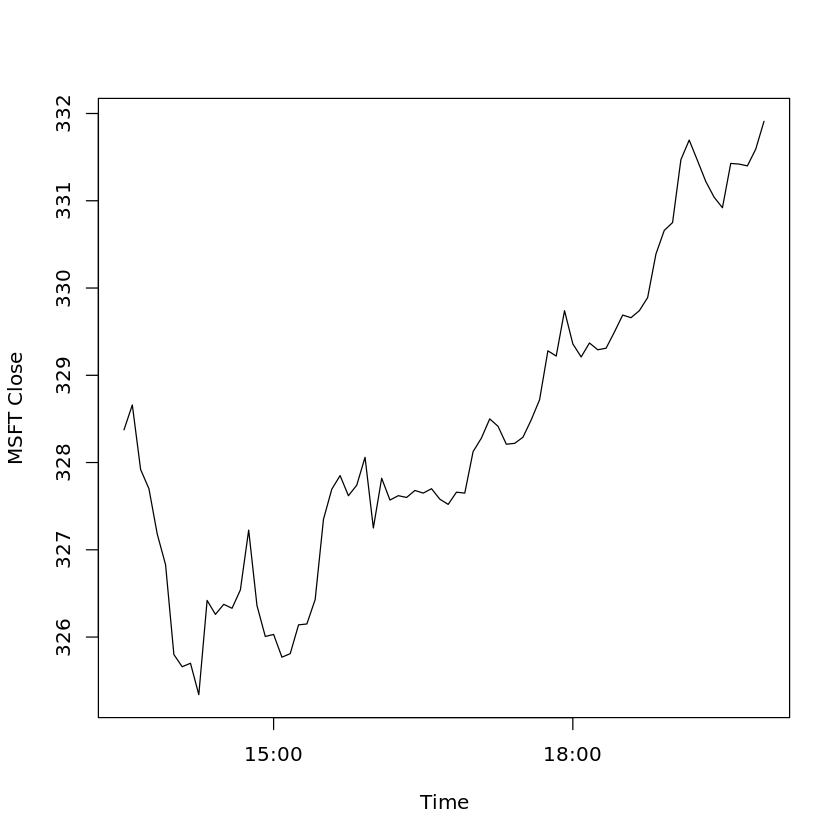

In [56]:
plot(df_msft_230612$date, df_msft_230612$close, type = 'l', xlab = "Time", ylab = "MSFT Close")

### 2.b - Other functionalities of *yahoofinancer*

The nice thing about *yahoofinancer* is that it is a rather small package, making the documentation rather short (18p). For instance, it contains some currency conversion functions, but it can also give a summary of several markets for instance:

In [57]:
get_market_summary()

[[1]]
[[1]]$fullExchangeName
[1] "SNP"

[[1]]$symbol
[1] "^GSPC"

[[1]]$gmtOffSetMilliseconds
[1] -14400000

[[1]]$language
[1] "en-US"

[[1]]$regularMarketTime
[[1]]$regularMarketTime$raw
[1] 1686682572

[[1]]$regularMarketTime$fmt
[1] "2:56PM EDT"


[[1]]$regularMarketChangePercent
[[1]]$regularMarketChangePercent$raw
[1] 0.5584322

[[1]]$regularMarketChangePercent$fmt
[1] "0.56%"


[[1]]$quoteType
[1] "INDEX"

[[1]]$typeDisp
[1] "Index"

[[1]]$tradeable
[1] FALSE

[[1]]$regularMarketPreviousClose
[[1]]$regularMarketPreviousClose$raw
[1] 4338.93

[[1]]$regularMarketPreviousClose$fmt
[1] "4,338.93"


[[1]]$exchangeTimezoneName
[1] "America/New_York"

[[1]]$regularMarketChange
[[1]]$regularMarketChange$raw
[1] 24.22998

[[1]]$regularMarketChange$fmt
[1] "24.23"


[[1]]$cryptoTradeable
[1] FALSE

[[1]]$firstTradeDateMilliseconds
[1] -1.325583e+12

[[1]]$exchangeDataDelayedBy
[1] 0

[[1]]$exchangeTimezoneShortName
[1] "EDT"

[[1]]$customPriceAlertConfidence
[1] "LOW"

[[1]]$marketState
[1] "REGULAR"

[[1]]$regularMarketPrice
[[1]]$regularMarketPrice$raw
[1] 4363.16

[[1]]$regularMarketPrice$fmt
[1] "4,363.16"


[[1]]$market
[1] "us_market"

[[1]]$quoteSourceName
[1] "Free Realtime Quote"

[[1]]$priceHint
[1] 2

[[1]]$sourceInterval
[1] 15

[[1]]$exchange
[1] "SNP"

[[1]]$shortName
[1] "S&P 500"

[[1]]$region
[1] "US"

[[1]]$triggerable
[1] FALSE

[[1]]$longName
[1] "S&P 500"


[[2]]
[[2]]$fullExchangeName
[1] "DJI"

[[2]]$symbol
[1] "^DJI"

[[2]]$gmtOffSetMilliseconds
[1] -14400000

[[2]]$language
[1] "en-US"

[[2]]$regularMarketTime
[[2]]$regularMarketTime$raw
[1] 1686682573

[[2]]$regularMarketTime$fmt
[1] "2:56PM EDT"


[[2]]$regularMarketChangePercent
[[2]]$regularMarketChangePercent$raw
[1] 0.3012162

[[2]]$regularMarketChangePercent$fmt
[1] "0.30%"


[[2]]$quoteType
[1] "INDEX"

[[2]]$typeDisp
[1] "Index"

[[2]]$tradeable
[1] FALSE

[[2]]$regularMarketPreviousClose
[[2]]$regularMarketPreviousClose$raw
[1] 34066.33

[[2]]$regularMarketPreviousClose$fmt
[1] "34,066.33"


[[2]]$exchangeTimezoneName
[1] "America/New_York"

[[2]]$regularMarketChange
[[2]]$regularMarketChange$raw
[1] 102.6133

[[2]]$regularMarketChange$fmt
[1] "102.61"


[[2]]$cryptoTradeable
[1] FALSE

[[2]]$firstTradeDateMilliseconds
[1] 694362600000

[[2]]$exchangeDataDelayedBy
[1] 0

[[2]]$exchangeTimezoneShortName
[1] "EDT"

[[2]]$customPriceAlertConfidence
[1] "LOW"

[[2]]$marketState
[1] "REGULAR"

[[2]]$regularMarketPrice
[[2]]$regularMarketPrice$raw
[1] 34168.94

[[2]]$regularMarketPrice$fmt
[1] "34,168.94"


[[2]]$market
[1] "us_market"

[[2]]$quoteSourceName
[1] "Free Realtime Quote"

[[2]]$priceHint
[1] 2

[[2]]$sourceInterval
[1] 120

[[2]]$exchange
[1] "DJI"

[[2]]$shortName
[1] "Dow 30"

[[2]]$region
[1] "US"

[[2]]$triggerable
[1] FALSE

[[2]]$longName
[1] "Dow Jones Industrial Average"


[[3]]
[[3]]$fullExchangeName
[1] "Nasdaq GIDS"

[[3]]$symbol
[1] "^IXIC"

[[3]]$gmtOffSetMilliseconds
[1] -14400000

[[3]]$language
[1] "en-US"

[[3]]$regularMarketTime
[[3]]$regularMarketTime$raw
[1] 1686682572

[[3]]$regularMarketTime$fmt
[1] "2:56PM EDT"


[[3]]$regularMarketChangePercent
[[3]]$regularMarketChangePercent$raw
[1] 0.6544139

[[3]]$regularMarketChangePercent$fmt
[1] "0.65%"


[[3]]$quoteType
[1] "INDEX"

[[3]]$typeDisp
[1] "Index"

[[3]]$tradeable
[1] FALSE

[[3]]$regularMarketPreviousClose
[[3]]$regularMarketPreviousClose$raw
[1] 13461.92

[[3]]$regularMarketPreviousClose$fmt
[1] "13,461.92"


[[3]]$exchangeTimezoneName
[1] "America/New_York"

[[3]]$regularMarketChange
[[3]]$regularMarketChange$raw
[1] 88.09668

[[3]]$regularMarketChange$fmt
[1] "88.10"


[[3]]$cryptoTradeable
[1] FALSE

[[3]]$firstTradeDateMilliseconds
[1] 34612200000

[[3]]$exchangeDataDelayedBy
[1] 0

[[3]]$exchangeTimezoneShortName
[1] "EDT"

[[3]]$customPriceAlertConfidence
[1] "LOW"

[[3]]$marketState
[1] "REGULAR"

[[3]]$regularMarketPrice
[[3]]$regularMarketPrice$raw
[1] 13550.02

[[3]]$regularMarketPrice$fmt
[1] "13,550.02"


[[3]]$market
[1] "us_market"

[[3]]$quoteSo

## Conditional selection